## Sección 5: Módulo Pandas para análisis de datos

In [2]:
import numpy as np
import pandas as pd

---
### Series

In [4]:
etiquetas = ['a','b','c']
datos = [1,2,3]

pd.Series(data = datos, index=etiquetas)

a    1
b    2
c    3
dtype: int64

In [5]:
array = np.arange(2,5)
pd.Series(array)

0    2
1    3
2    4
dtype: int64

In [6]:
array = np.arange(2,5)
etiquetas = ['venta1','venta2','venta3']

serie = pd.Series(array,etiquetas)
serie

venta1    2
venta2    3
venta3    4
dtype: int64

In [7]:
serie['venta2']

3

In [8]:
datos2 = ['informatica',300,'impresora',400]
pd.Series(datos2)

0    informatica
1            300
2      impresora
3            400
dtype: object

In [9]:
serie1 = pd.Series([1,2,3],['ventas1','ventas2','ventas3'])
serie2 = pd.Series([4,5,6,7],['ventas1','ventas2','ventas3','ventas4'])

serie_suma = serie1 + serie2 # El valor que no ha podido sumar (ventas4) es valor nulo (NaN)

serie_suma

ventas1    5.0
ventas2    7.0
ventas3    9.0
ventas4    NaN
dtype: float64

---
### DataFrames

In [11]:
filas = ['ventas1','ventas2','ventas3']
columnas = ['zonaA','zonaB','zonaC']
datos = [[123,421,256],[234,541,257],[120,451,258]]

dataframe = pd.DataFrame(datos,filas,columnas) # crear dataframe
dataframe

,zonaA,zonaB,zonaC
ventas1,123,421,256
ventas2,234,541,257
ventas3,120,451,258


In [12]:
dataframe.loc['ventas1'] # selecciona la fila 'ventas1'

zonaA    123
zonaB    421
zonaC    256
Name: ventas1, dtype: int64

In [13]:
dataframe.loc[['ventas1','ventas2']] # selecciona las filas 'ventas1' y 'ventas2'

,zonaA,zonaB,zonaC
ventas1,123,421,256
ventas2,234,541,257


In [14]:
dataframe['zonaA'] # selecciona la columna 'zonaA'

ventas1    123
ventas2    234
ventas3    120
Name: zonaA, dtype: int64

In [15]:
dataframe[['zonaA','zonaC']] # selecciona las columnas 'zonaA' y 'zonaB'

,zonaA,zonaC
ventas1,123,256
ventas2,234,257
ventas3,120,258


In [16]:
dataframe.loc['ventas1']['zonaA'] # selecciona una fila y una columna

123

In [17]:
dataframe['Todaslaszonas'] = dataframe['zonaA'] + dataframe['zonaB']+ dataframe['zonaC'] # suma de los valores de las filas
dataframe

,zonaA,zonaB,zonaC,Todaslaszonas
ventas1,123,421,256,800
ventas2,234,541,257,1032
ventas3,120,451,258,829


In [18]:
dataframe.drop('Todaslaszonas',axis=1) # eliminar una columna de la visualización

,zonaA,zonaB,zonaC
ventas1,123,421,256
ventas2,234,541,257
ventas3,120,451,258


In [19]:
dataframe

,zonaA,zonaB,zonaC,Todaslaszonas
ventas1,123,421,256,800
ventas2,234,541,257,1032
ventas3,120,451,258,829


In [20]:
dataframe.drop('Todaslaszonas',axis=1, inplace=True) # eliminar una columna definitivamente
dataframe

,zonaA,zonaB,zonaC
ventas1,123,421,256
ventas2,234,541,257
ventas3,120,451,258


In [21]:
dataframe.drop('ventas3') # drop por defecto borra una fila (axis=0)

,zonaA,zonaB,zonaC
ventas1,123,421,256
ventas2,234,541,257


In [22]:
dataframe

,zonaA,zonaB,zonaC
ventas1,123,421,256
ventas2,234,541,257
ventas3,120,451,258


In [23]:
dataframe.drop('ventas3', inplace=True)
dataframe

,zonaA,zonaB,zonaC
ventas1,123,421,256
ventas2,234,541,257


In [24]:
dataframe.shape # forma de la base de datos

(2, 3)

---
### DataFrames: Selección de datos con una condición

In [26]:
filas = 'ventas1 ventas2 ventas3'.split()
columnas = 'zonaA zonaB zonaC'.split()

datos = [[120,340,250],[210,450,250],[310,210,140]]

dataframe = pd.DataFrame(datos, filas, columnas)
dataframe

,zonaA,zonaB,zonaC
ventas1,120,340,250
ventas2,210,450,250
ventas3,310,210,140


In [27]:
# Caso 1: Aplicar una condición al DataFrame completo
condicion = dataframe > 200 # los valores que no cumplen (>200) se reemplazan con NaN
dataframe[condicion]

,zonaA,zonaB,zonaC
ventas1,NaN,340,250.0
ventas2,210.0,450,250.0
ventas3,310.0,210,NaN


In [28]:
dataframe

,zonaA,zonaB,zonaC
ventas1,120,340,250
ventas2,210,450,250
ventas3,310,210,140


In [29]:
# Caso 2: Filtrar filas aplicando una condición a una columna específica
condicion = dataframe['zonaA'] > 200 # se eliminan filas donde 'zonaA' no cumple (>200)
dataframe[condicion]

,zonaA,zonaB,zonaC
ventas2,210,450,250
ventas3,310,210,140


In [30]:
dataframe

,zonaA,zonaB,zonaC
ventas1,120,340,250
ventas2,210,450,250
ventas3,310,210,140


In [31]:
condicion = (dataframe['zonaA'] > 200) | (dataframe['zonaB'] > 400)
dataframe[condicion]

,zonaA,zonaB,zonaC
ventas2,210,450,250
ventas3,310,210,140


In [32]:
dataframe[condicion][['zonaB','zonaC']]

,zonaB,zonaC
ventas2,450,250
ventas3,210,140


---
### DataFrames: Modificación de los nombres de las filas

In [34]:
filas = 'ventas1 ventas2 ventas3'.split()
columnas = 'zonaA zonaB zonaC'.split()

datos = [[100,200,250],[210,300,425],[250,310,124]]

dataframe = pd.DataFrame(datos, filas, columnas)
dataframe

,zonaA,zonaB,zonaC
ventas1,100,200,250
ventas2,210,300,425
ventas3,250,310,124


In [35]:
nuevas_filas = 'dia1 dia2 dia3'.split()

dataframe['dias'] = nuevas_filas
dataframe

,zonaA,zonaB,zonaC,dias
ventas1,100,200,250,dia1
ventas2,210,300,425,dia2
ventas3,250,310,124,dia3


In [36]:
# índice: etiqueta única que se usa para identificar y acceder a las filas
# método set_index: establece una columna (o varias) como índice

dataframe.set_index('dias') # Solo afecta a la visualización

,zonaA,zonaB,zonaC
dias,,,
dia1,100,200,250
dia2,210,300,425
dia3,250,310,124


In [37]:
dataframe

,zonaA,zonaB,zonaC,dias
ventas1,100,200,250,dia1
ventas2,210,300,425,dia2
ventas3,250,310,124,dia3


In [38]:
dataframe = dataframe.set_index('dias') 

In [39]:
dataframe

,zonaA,zonaB,zonaC
dias,,,
dia1,100,200,250
dia2,210,300,425
dia3,250,310,124


---
### Pandas: Tratamiento de datos nulos o sin valor

In [41]:
diccionario = {'A':[4,5,np.nan], 'B':[6,1,5], 'C':[np.nan, 4, np.nan]}

dataframe = pd.DataFrame(diccionario)
dataframe

,A,B,C
0,4.0,6,NaN
1,5.0,1,4.0
2,NaN,5,NaN


In [42]:
dataframe.dropna() # elimina de la visualización los valores nulos

,A,B,C
1,5.0,1,4.0


In [43]:
dataframe.dropna(axis=1) # eliminar de la visualización filas con NaN

,B
0,6
1,1
2,5


In [44]:
dataframe

,A,B,C
0,4.0,6,NaN
1,5.0,1,4.0
2,NaN,5,NaN


In [45]:
dataframe.fillna(value=100) # reemplazar los valores NaN por 100

,A,B,C
0,4.0,6,100.0
1,5.0,1,4.0
2,100.0,5,100.0


In [46]:
valor_medio = dataframe.mean()
valor_medio

A    4.5
B    4.0
C    4.0
dtype: float64

In [47]:
dataframe.fillna(value=valor_medio) # rellenar con el valor medio para no distorsionar los datos

,A,B,C
0,4.0,6,4.0
1,5.0,1,4.0
2,4.5,5,4.0


---
### Pandas: Agrupación de los datos

In [49]:
diccionario = {'dias':['dia1','dia1','dia2','dia2','dia3'], 'vendedores':['Antonio','Maria','Jose','Marta','Juan'], \
               'ventas':[100,400,200,500,300]}

dataframe = pd.DataFrame(diccionario)
dataframe

,dias,vendedores,ventas
0,dia1,Antonio,100
1,dia1,Maria,400
2,dia2,Jose,200
3,dia2,Marta,500
4,dia3,Juan,300


In [50]:
dataframe.groupby('dias')

In [51]:
dataframe.groupby('dias')['ventas'].mean() # Media de ventas por día

dias
dia1    250.0
dia2    350.0
dia3    300.0
Name: ventas, dtype: float64

In [52]:
dataframe.groupby('dias')['ventas'].sum() # Suma de ventas por día

dias
dia1    500
dia2    700
dia3    300
Name: ventas, dtype: int64

In [53]:
dataframe.groupby('dias').describe() # Estadísticas con los datos más habituales

ventas                                                      
      count   mean         std    min    25%    50%    75%    max
dias                                                             
dia1    2.0  250.0  212.132034  100.0  175.0  250.0  325.0  400.0
dia2    2.0  350.0  212.132034  200.0  275.0  350.0  425.0  500.0
dia3    1.0  300.0         NaN  300.0  300.0  300.0  300.0  300.0

---
### Pandas - Combinar DataFrames

In [120]:
diccionario = {'A':[1,2,3], 'B':[4,5,6], 'C':[7,8,9]}

dataframe1 = pd.DataFrame(diccionario)
dataframe1

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [122]:
diccionario2 = {'A':[11,12,13], 'B':[14,15,16], 'C':[17,18,19]}

dataframe2 = pd.DataFrame(diccionario2)
dataframe2

,A,B,C
0,11,14,17
1,12,15,18
2,13,16,19


In [126]:
pd.concat([dataframe1, dataframe2]) # Concatenar dataframes

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
0,11,14,17
1,12,15,18
2,13,16,19


In [130]:
pd.concat([dataframe1, dataframe2], axis=1)

,A,B,C,A,B,C
0,1,4,7,11,14,17
1,2,5,8,12,15,18
2,3,6,9,13,16,19


---
### Pandas - Merge DataFrames

In [147]:
diccionario = {'A':[1,2,3], 'B':[4,5,6], 'clave':['c1','c2','c3']}

dataframe1 = pd.DataFrame(diccionario)
dataframe1

,A,B,clave
0,1,4,c1
1,2,5,c2
2,3,6,c3


In [149]:
diccionario2 = {'C':[11,12,13], 'D':[14,15,16], 'clave':['c1','c2','c3']}

dataframe2 = pd.DataFrame(diccionario2)
dataframe2

,C,D,clave
0,11,14,c1
1,12,15,c2
2,13,16,c3


In [151]:
pd.merge(dataframe1,dataframe2, on='clave') # utiliza la columna 'clave' para unir ambos dataframes

,A,B,clave,C,D
0,1,4,c1,11,14
1,2,5,c2,12,15
2,3,6,c3,13,16


---
### Pandas - Join DataFrames

In [162]:
diccionario = {'A':[1,2,3,4], 'B':[4,5,6,7]}

dataframe1 = pd.DataFrame(diccionario, index=['i1','i2','i3','i4'])
dataframe1

,A,B
i1,1,4
i2,2,5
i3,3,6
i4,4,7


In [164]:
diccionario2 = {'C':[11,12,13], 'D':[14,15,16]}

dataframe2 = pd.DataFrame(diccionario2, index=['i1','i2','i3']) # Los dataframes deben tener índices iguales para hacer un join
dataframe2

,C,D
i1,11,14
i2,12,15
i3,13,16


In [170]:
dataframe1.join(dataframe2)

,A,B,C,D
i1,1,4,11.0,14.0
i2,2,5,12.0,15.0
i3,3,6,13.0,16.0
i4,4,7,NaN,NaN


In [ ]:
# pd.concat(): función para unir dataframes apilando filas o columnas sin claves específicas.  
# pd.merge(): función para combinar dataframes basados en columnas comunes o claves.  
# .join(): método para unir dataframes basados en índices.

---
### Pandas - Operaciones

In [189]:
diccionario = {'A':[11,12,10,12], 'B':[14,18,16,17]}

dataframe = pd.DataFrame(diccionario, index=['i1','i2','i3','i4'])
dataframe

,A,B
i1,11,14
i2,12,18
i3,10,16
i4,12,17


In [191]:
dataframe['A'].unique() # obtener los valores únicos

array([11, 12, 10])

In [193]:
dataframe['A'].nunique() # contar valores únicos

3

In [197]:
dataframe['A'].value_counts() # contar repeticiones valores únicos

A
12    2
11    1
10    1
Name: count, dtype: int64

In [207]:
dataframe

,A,B
i1,11,14
i2,12,18
i3,10,16
i4,12,17


In [205]:
dataframe['A'].apply(lambda x: x*2) # aplicar una función a los valores de una columna

i1    22
i2    24
i3    20
i4    24
Name: A, dtype: int64

In [209]:
dataframe

,A,B
i1,11,14
i2,12,18
i3,10,16
i4,12,17


In [221]:
dataframe.columns # muestra una lista con los nombres de las columnas

Index(['A', 'B'], dtype='object')

In [223]:
dataframe.index # muestra una lista con los nombres de los índices

Index(['i1', 'i2', 'i3', 'i4'], dtype='object')

In [229]:
dataframe.sort_values('B') # ordenar por los valores de 'B'

,A,B
i1,11,14
i3,10,16
i4,12,17
i2,12,18


---
### Pandas - Ficheros EXCEL

In [250]:
pwd

'/home/aramos-m/Documentos/notebooks/IBM_AI/MachineLearning'

In [364]:
# ERROR:
# 'Unnamed: 0' aparece porque el archivo excel fue creado con to_excel() sin index=False, 
# lo que guarda el índice original del dataframe como una columna adicional.

dataframe = pd.read_excel('Ejemplo_excel.xlsx')
dataframe

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [366]:
# SOLUCIÓN:
# (A) convertir la primera columna 'Unnamed: 0' en índice con index_col=0
# (B) eliminar la primera columna 'Unnamed: 0' con .drop()

dataframe = pd.read_excel('Ejemplo_excel.xlsx', index_col=0)
dataframe

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [368]:
dataframe['e'] = [20,21,22,23]
dataframe

,a,b,c,d,e
0,0,1,2,3,20
1,4,5,6,7,21
2,8,9,10,11,22
3,12,13,14,15,23


In [429]:
# Aquí el instructor exporta el dataframe con el índice como columna (index=True, opción por defecto)

dataframe.to_excel('salida_excel.xlsx', sheet_name='Hoja1')

In [431]:
ls

01_ejercicios_iniciales.ipynb  02_numpy_bases.ipynb
01_ejercicios_unittest.ipynb   03_pandas_bases.ipynb
01_python_bases.ipynb          Ejemplo_excel.xlsx
02_ejercicios_iniciales.ipynb  salida_excel.xlsx
02_ejercicios_unittest.ipynb


In [433]:
dataframe2 = pd.read_excel('salida_excel.xlsx')
dataframe2

,Unnamed: 0,a,b,c,d,e
0,0,0,1,2,3,20
1,1,4,5,6,7,21
2,2,8,9,10,11,22
3,3,12,13,14,15,23


In [435]:
# Para exportarlo sin el índice como columna, usamos index=False.

dataframe.to_excel('salida_excel.xlsx', sheet_name='Hoja1', index=False)

In [437]:
dataframe2 = pd.read_excel('salida_excel.xlsx')
dataframe2

,a,b,c,d,e
0,0,1,2,3,20
1,4,5,6,7,21
2,8,9,10,11,22
3,12,13,14,15,23


---
### Pandas - Ficheros HTML

In [459]:
pagina_web = 'https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_y_territorios_dependientes_por_poblaci%C3%B3n'

In [461]:
datos = pd.read_html(pagina_web)

In [463]:
type(datos)

list

In [467]:
dataframe = datos[0]

In [469]:
dataframe.head(10)

,N.º,País (o territorio dependiente),Proyección exponencial de la población al 1/1/2025[7]​,Total mun- dial (%),Cambio medio anual (%)[8]​,Cambio absoluto anual promedio,Cambio medio abs. total anual (%),Años para even- tual du- pli- ca- ción[9]​,"Censo más reciente, última estimación oficial, proyección de la ONU o reloj de población nacional",Fecha de esta última cifra de población en particular (d/mm/aaaa)[10]​,Tipo[11]​,Enlace o hipervínculo (usualmente de tipo oficial) de esta última cifra de población
0,1,India,1 411 278 000,1752,090,12 726 000,1503,77,1 404 910 000,1/07/2024,A,web.archive.org
1,2,China[12]​,1 407 582 000,1747,-015,-2 075 000,-,-,1 409 670 000,31/12/2023,E,www.stats.gov.cn
2,3,Estados Unidos,341 153 000,423,061,2 077 000,245,114,341 138 000,30/12/2024,R,www.census.gov
3,4,Indonesia,284 144 000,353,117,3 318 000,392,60,282 477 584,30/06/2024,E,dispendukcapil.acehtimurkab.go.id
4,5,Pakistán,253 010 000,314,256,6 485 000,766,27,241 499 431,1/03/2023,C,www.pbs.gov.pk
5,6,Nigeria,233 077 000,289,273,6 372 000,752,26,223 800 000,1/07/2023,E,cdn.sanity.io
6,7,Brasil,213 419 000,265,078,1 668 000,197,89,212 583 750,1/07/2024,E,agenciadenoticias.ibge.gov.br
7,8,Bangladés,176 284 000,219,147,2 599 000,307,47,169 828 911,15/06/2022,C,bdnews24.com
8,9,Rusia[13]​,146 461 000,182,018,257 000,030,396,146 203 613,1/01/2024,E,rosstat.gov.ru
9,10,México,130 536 000,162,074,963 000,114,94,130 054 247,7/2024,E,www.inegi.org.mx


---
### Pandas - SQL

In [524]:
# conda install sqlalchemy
# pip install sqlalchemy

In [526]:
from sqlalchemy import create_engine

In [528]:
diccionario = {'A':[1,2,3], 'B':[4,5,6]}

dataframe = pd.DataFrame(diccionario)
dataframe

,A,B
0,1,4
1,2,5
2,3,6


In [530]:
# SQLite es un motor de base de datos ligero que guarda los datos en memoria (temporalmente) 
# y no requiere servidor. Los datos se pierden al finalizar el programa.

engine = create_engine('sqlite:///:memory:') # Creamos un motor de base de datos en memoria

In [532]:
# .to_sql guarda el contenido de un dataframe en una tabla de base de datos,
# devuelve el número de filas insertadas en la base de datos

dataframe.to_sql('tabla', engine, index=False)

3

In [534]:
# pd.read_sql() ejecuta una consulta SQL en una base de datos y carga el resultado en un dataframe
# La conexión a la base de datos se gestiona a través de 'con=engine' que especifica el motor

datos_leidos_bd = pd.read_sql('tabla',con=engine)
datos_leidos_bd

,A,B
0,1,4
1,2,5
2,3,6


---
### Pandas - Gráficos

In [537]:
dataframe = pd.DataFrame(np.random.randint(200, size=(50,4)), columns=['a','b','c','d'])
dataframe

,a,b,c,d
0,62,54,104,55
1,66,138,47,113
2,67,62,51,132
3,46,167,52,28
4,61,114,47,120
5,24,76,125,35
6,47,167,38,153
7,65,182,45,73
8,182,179,138,59
9,75,148,121,186


<Axes: >

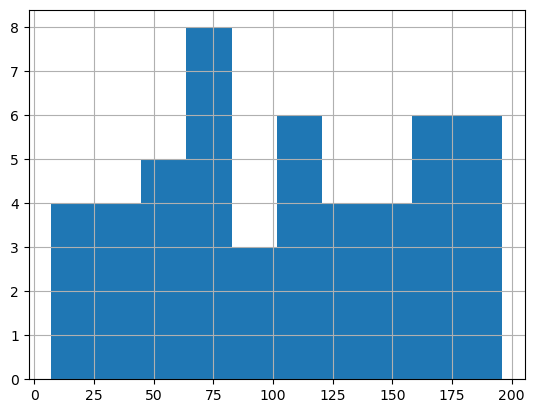

In [541]:
dataframe['b'].hist()

<Axes: >

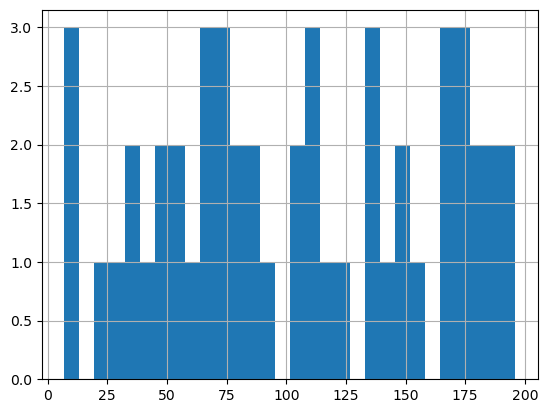

In [543]:
dataframe['b'].hist(bins=30)

<Axes: ylabel='Frequency'>

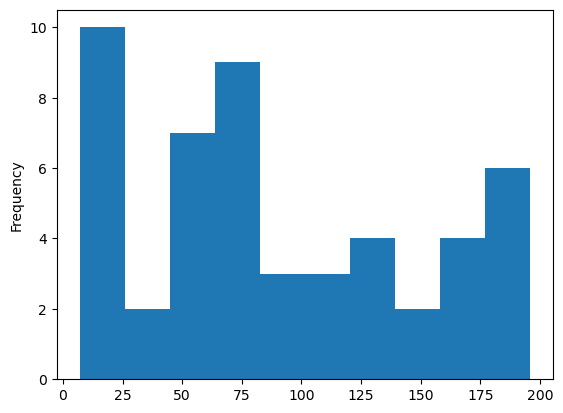

In [545]:
dataframe['a'].plot.hist()

<Axes: >

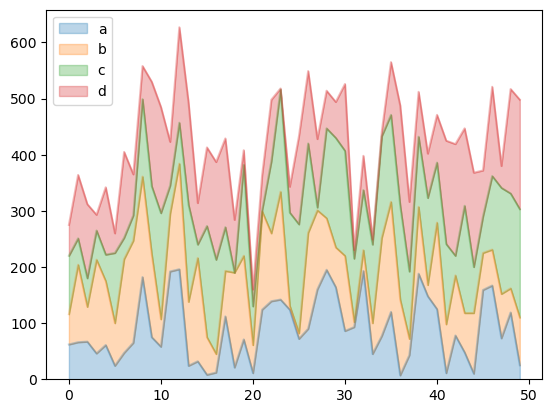

In [549]:
dataframe.plot.area(alpha=0.3)

<Axes: >

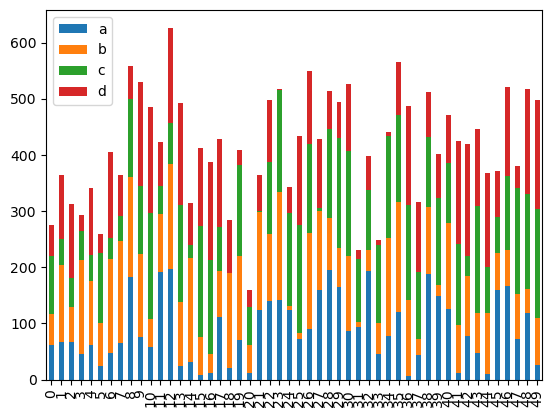

In [558]:
dataframe.plot.bar(stacked=True)

<Axes: xlabel='a', ylabel='b'>

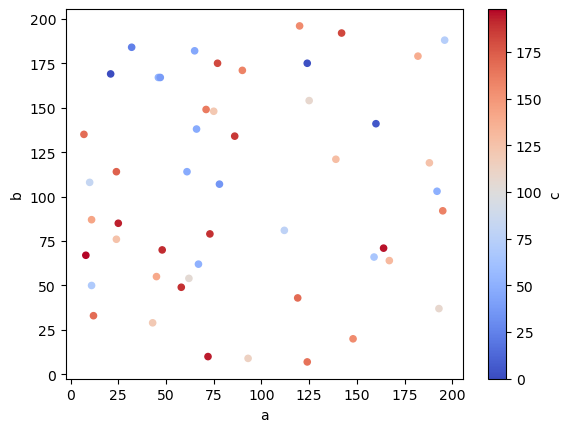

In [564]:
dataframe.plot.scatter(x='a',y='b',c='c',cmap='coolwarm')

<Axes: >

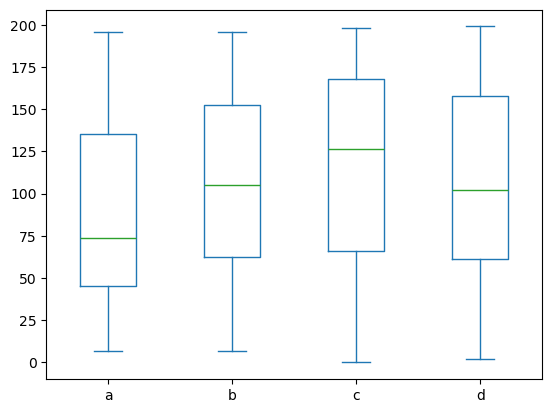

In [566]:
dataframe.plot.box()

<Axes: xlabel='a', ylabel='b'>

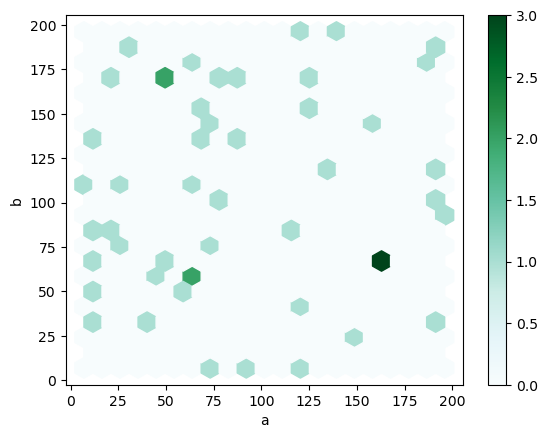

In [574]:
dataframe.plot.hexbin(x='a',y='b',gridsize=20)

<Axes: ylabel='Density'>

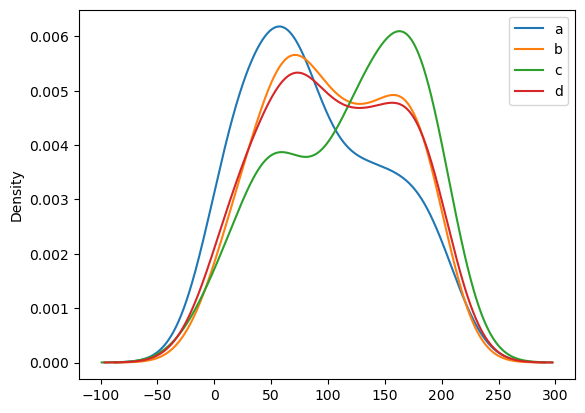

In [570]:
dataframe.plot.kde()

<Axes: ylabel='Density'>

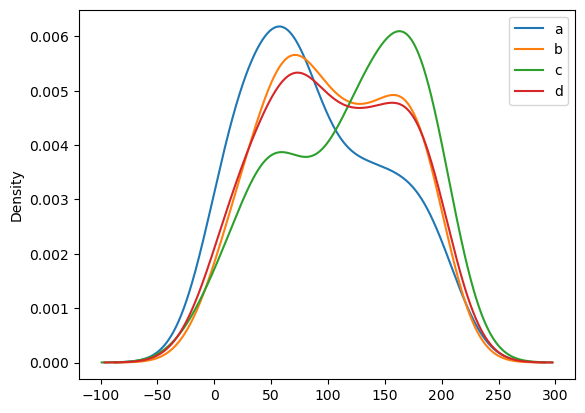

In [572]:
dataframe.plot.density()